In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy.table import Table
import astropy.units as u

from lightkurve import search_lightcurve

from gadfly import (
    Hyperparameters, PowerSpectrum,
    StellarOscillatorKernel, ShotNoiseKernel,
    SolarOscillatorKernel, scale
)

In [2]:
# from gadfly.sun import download_soho_virgo_time_series
# virgo_lc = download_soho_virgo_time_series()
# virgo_ps = PowerSpectrum.from_light_curve(virgo_lc).bin(5000)

In [3]:
# virgo_ps.plot(p_mode_inset=True)
# SolarOscillatorKernel().plot()

In [4]:
# arr = '''0.30235891 0.23128294 0.2131557  0.19996473 0.18874872 0.18671132
#  0.17705881 0.16877614 0.16214573 0.16723977 0.1597754  0.15324718
#  0.14791708 0.15203654 0.14603316 0.14059504 0.13598342 0.13957646
#  0.13438292 0.12964249 0.12551449 0.12876268 0.12409998 0.11978619
#  0.11601523 0.11900292 0.11475822 0.11082018 0.1073203  0.1101176
#  0.10618536 0.10255627 0.09931023 0.10193169 0.0982775  0.09487056
#  0.09180071 0.09429875 0.09085504 0.08763937 0.08471757 0.08711792
#  0.08384349 0.08079247 0.07803    0.08031757 0.07722741 0.07435112
#  0.07174296 0.07391838 0.07101215 0.06832635 0.06588271 0.06793888
#  0.06522301 0.06270862 0.06042532 0.062359   0.05982852 0.05748605
#  0.05535587 0.05717481 0.05481514 0.05263714 0.050658   0.05235724
#  0.05017306 0.04814931 0.04631458 0.04790146 0.04587887 0.04402793
#  0.04233502 0.04380856 0.04193188 0.04023497 0.03867657 0.04004493
#  0.03832225 0.03675465 0.03658129'''

# plt.semilogx(np.array(list(map(float, arr.split()))))

In [5]:
# k = SolarOscillatorKernel()
hp_solar = Hyperparameters.for_star(1*u.M_sun, 1*u.R_sun, 5777*u.K, 1*u.L_sun, bandpass='SOHO VIRGO') #Kepler/Kepler.K')#bandpass='SOHO VIRGO')
# k2 = StellarOscillatorKernel(hp_solar)

In [6]:
from gadfly.psd import plot_power_spectrum
from gadfly.sun import _p_mode_fit_to_sho_hyperparams
from gadfly.core import default_hyperparameter_path, _sho_psd
hyperparameters = hp_solar

In [7]:
# mass, radius, temperature, luminosity = 1*u.M_sun, 1*u.R_sun, 5777*u.K, 1*u.L_sun


# hyperparameters = Hyperparameters._load_from_json(default_hyperparameter_path)
# # extract the granulation hyperparameters
# granulation_hyperparams = [
#     item for item in hyperparameters
#     if item['metadata']['source'] == 'granulation'
# ]

# # extract the p-mode hyperparameters
# p_mode_hyperparams = [
#     item for item in
#     sorted(
#         hyperparameters,
#         key=lambda x: x['metadata'].get('degree', -1)
#     )
#     if item['metadata']['source'] == 'oscillation'
# ]
# # put the p-mode hyperparams in a vector format, which is needed
# # shortly for the call to _p_mode_fit_to_sho_hyperparams
# p_mode_hyperparams = np.transpose(
#     [[param_set['hyperparameters'].get(param)
#       for param in ['S0', 'Q']]
#      for param_set in p_mode_hyperparams]
# ).ravel()
# # get the hyperparameter sets and the corresponding labels to the
# # spherical degree "ell" for each set:
# (S0_fit, solar_w0, Q_fit), ell_labels = (
#     _p_mode_fit_to_sho_hyperparams(p_mode_hyperparams)
# )

# solar_gran_S0, solar_gran_w0, solar_gran_Q = np.transpose(
#     [[param_set['hyperparameters'].get(param)
#       for param in ['S0', 'w0', 'Q']]
#      for param_set in granulation_hyperparams]
# )


# solar_nu = solar_w0 / (2 * np.pi) * u.uHz

# # basic asteroseismic parameters:
# wavelength = 550*u.nm
# solar_nu_max = scale._solar_nu_max
# scaled_nu_max = solar_nu_max * scale.nu_max(mass, temperature, radius)
# scale_delta_nu = scale.delta_nu(mass, radius)
# solar_delta_nu = solar_nu - solar_nu_max
# scaled_delta_nu = solar_delta_nu * scale_delta_nu
# scaled_nu = scaled_nu_max + scaled_delta_nu
# scaled_w0 = 2 * np.pi * scaled_nu.to(u.uHz).value


# granulation_background_solar = _sho_psd(
#     2 * np.pi * solar_nu[:, None],
#     solar_gran_S0[None, :] * u.cds.ppm**2 / u.uHz,
#     solar_gran_w0[None, :] * u.uHz,
#     solar_gran_Q[None, :]
# )


# S0_scale_factors = scale.p_mode_intensity(
#     temperature, scaled_nu, scaled_nu_max,
#     scale._solar_delta_nu * scale_delta_nu,
#     wavelength
# )
# p_mode_amps_solar = _sho_psd(
#     2 * np.pi * solar_nu[:, None],
#     (S0_fit * S0_scale_factors)[None, :] * u.cds.ppm**2 / u.uHz,
#     solar_w0[None, :] * u.uHz,
#     Q_fit[None, :]
# )


In [8]:
# plt.plot(solar_nu, np.squeeze(p_mode_amps_solar).sum(1));

In [9]:
# from astropy.visualization import quantity_support

# with quantity_support():
#     plt.loglog(solar_nu, granulation_background_solar.sum(1) + p_mode_amps_solar.sum(1));
#     k.plot()

In [10]:
def _sho_psd(omega, S0, w0, Q):
    """
    Stochastically driven, damped harmonic oscillator.
    """
    # This is the celerite2 SHO PSD:
    return (
        np.sqrt(2/np.pi) * S0 * w0**4 /
        ((omega**2 - w0**2)**2 + (omega**2 * w0**2 / Q**2))
    )

solar_nu = np.array([3090])[:, None] * u.uHz
S0_fit = np.array([10, 0.1])
Q_fit = np.array([100, 0.5])
solar_psd_at_p_mode_peaks = _sho_psd(
    2 * np.pi * 3090, S0_fit[None, :],
    2 * np.pi * solar_nu.value, Q_fit[None, :]
) * u.cds.ppm ** 2 / u.uHz

In [11]:
freq = np.linspace(2000, 4000, 10_000) * u.uHz
# plt.plot(freq, k.get_psd(2*np.pi*freq.value) / k2.get_psd(2*np.pi*freq.value) - 1)

# np.max(k.get_psd(2*np.pi*freq.value) / k2.get_psd(2*np.pi*freq.value) - 1), np.max(k2.get_psd(2*np.pi*freq.value)/k.get_psd(2*np.pi*freq.value) - 1)

In [12]:
# k.plot(freq=freq, scaling_low_freq='plot', ax=plt.gca(), kernel_kwargs=dict(lw=4, color='k'))#p_mode_inset=True)
# k2.plot(freq=freq, scaling_low_freq='semilogy', ax=plt.gca(), kernel_kwargs=dict(lw=2, color='r'))#, p_mode_inset=True)
# plt.gca().set(
#     # xlim=[2000, 4000],
#     # ylim=[1e-2, 1e0]
# )
# plt.grid()

In [13]:
from gadfly.sun import broomhall_p_mode_freqs

# broomhall_p_mode_freqs()

In [14]:
# columns to unpack from the table:
cols = ['KIC', 'mass', 'rad', 'teff', 'lum', 'cad_2']
#sequence = Table.read('../../docs/gadfly/huber2011_sample-2.ecsv', format='ascii.ecsv')
sequence = Table.read('../huber2011_sample-2.ecsv', format='ascii.ecsv')

In [15]:

# # first get each light curve:
# light_curves = []
# for i, row in enumerate(sequence[cols]):
#     kic, mass, rad, temp, lum, cad = row
#     name = f'KIC {kic}'
#     cadence_str = 'short' if cad == 0 else 'long'
#     light_curve = search_lightcurve(
#         name, mission='Kepler',
#         cadence=cadence_str
#     ).download_all()
#     light_curves.append(light_curve)

In [16]:
# for i, row in enumerate(sequence[cols]):
#     kic, mass, rad, temp, lum, cad = row

#     scaled_nu = np.logspace(-2, 3.5, 100) * u.uHz
#     scaled_nu_max = scale._solar_nu_max * scale.nu_max(mass * u.M_sun, temp * u.K, rad * u.R_sun)
#     scaled_delta_nu = scale._solar_delta_nu * scale.delta_nu(mass * u.M_sun, rad*u.R_sun)

#     rel_int = [scale.p_mode_intensity(temp * u.K, n, scaled_nu_max, scaled_delta_nu) * 
#                scale.p_mode_amplitudes(mass * u.M_sun, temp * u.K, lum * u.L_sun) for n in scaled_nu]

#     plt.loglog(scaled_nu, rel_int, label=f"M={mass:.1f}")
# plt.legend()

In [17]:
# mass = rad = lum = 1
# temp = 5777
# scaled_nu = np.logspace(2, 4, 500) * u.uHz
# scaled_nu_max = scale._solar_nu_max * scale.nu_max(mass * u.M_sun, temp * u.K, rad * u.R_sun)
# scaled_delta_nu = scale._solar_delta_nu * scale.delta_nu(mass * u.M_sun, rad*u.R_sun)

# rel_int = [scale.p_mode_intensity(temp * u.K, n, scaled_nu_max, scaled_delta_nu) * 
#            scale.p_mode_amplitudes(mass * u.M_sun, temp * u.K, lum * u.L_sun) for n in scaled_nu]

# plt.loglog(scaled_nu, rel_int, label=f"M={mass:.1f}")
# plt.legend()

In [18]:
# sequence[cols]

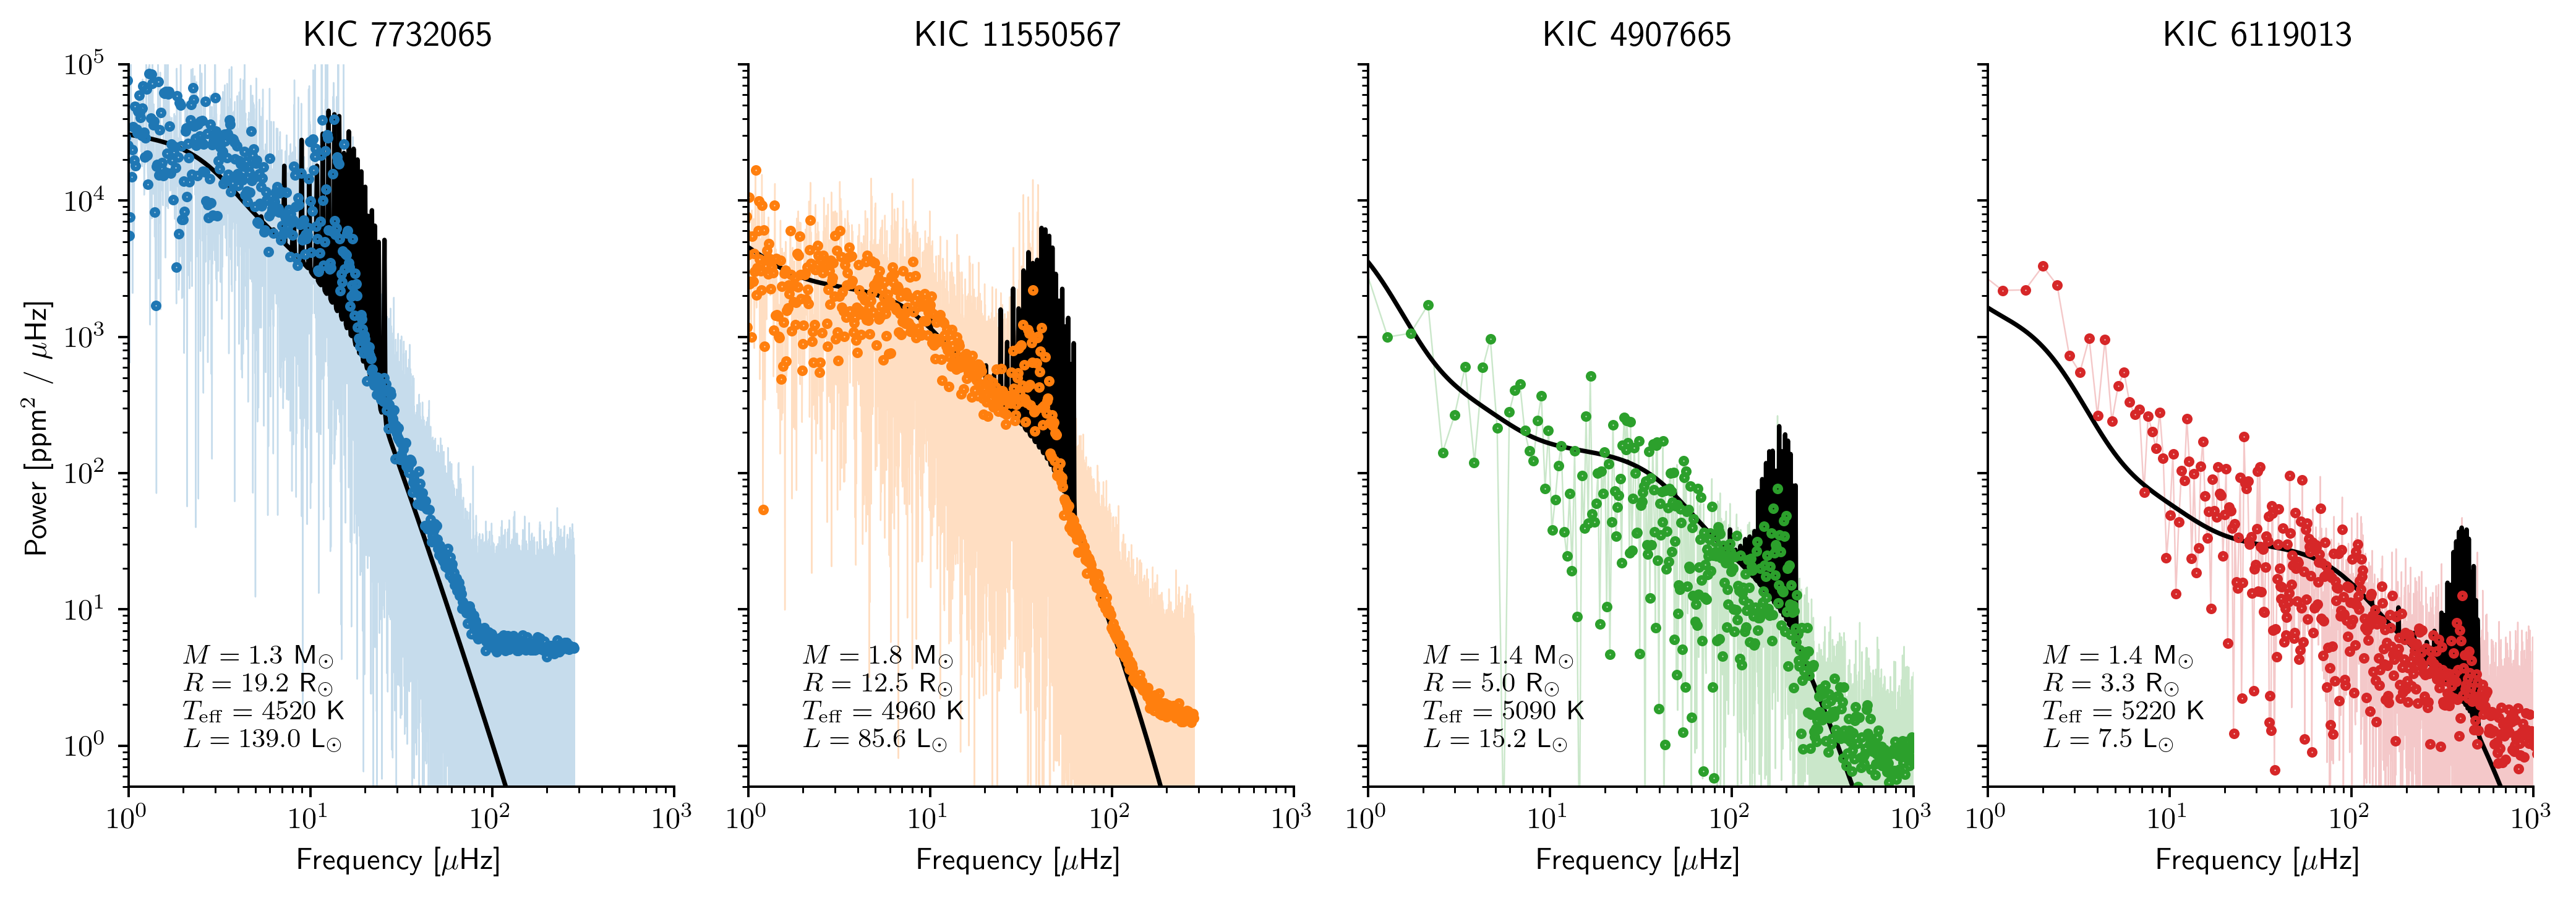

In [24]:
from copy import deepcopy
from gadfly import scale

plt.rc('text', usetex=True)

# now plot them each:
fig, axes = plt.subplots(1, 4, figsize=(12, 4.25), sharey=True, sharex=True, dpi=350)

# solar = SolarOscillatorKernel(1*u.min)


for i, row in enumerate(sequence[cols]):
    ax = axes[i]
    kic, mass, rad, temp, lum, cad = row
    name = f'KIC {kic}'
    hp = Hyperparameters.for_star(
        mass * u.M_sun, rad * u.R_sun, 
        temp * u.K, lum * u.L_sun, 
        name=name, quiet=True
    )

    cadence_str = 'short' if cad == 0 else 'long'
    light_curve = search_lightcurve(
        name, mission='Kepler', #quarter=range(6),
        cadence=cadence_str
    ).download_all()

    kernel = (
        StellarOscillatorKernel(hp, 1*u.min if cad == 0 else 30*u.min) #+
        # add in a kernel for Kepler shot noise
        # ShotNoiseKernel.from_kepler_light_curve(light_curve)
    )

    ps = PowerSpectrum.from_light_curve(
        light_curve, name=name,
        detrend_poly_order=2, 
        sigma=5
    )
    ax.plot(
        ps.frequency, ps.power, 
        lw=0.5, alpha=0.25, color=f"C{i}", 
        zorder=-100, rasterized=True
    )
    ps_old = deepcopy(ps)
    ps = ps.bin(1_000)

    kernel_kw = dict(color="k", alpha=0.9, rasterized=True)
    mfc = 'none'
    obs_kw = dict(
        color=f"C{i}", marker='o', 
        lw=0, ms=2, mfc=mfc,
        rasterized=True,
        markeredgewidth=1.5
    )
    ps.plot(
        ax=ax,
        p_mode_inset=False,
        freq=freq,
        obs_kwargs=obs_kw,
        title=name, 
        legend=False
    )
    
    # nu_max = scale._solar_nu_max.value * scale.nu_max(mass * u.M_sun, temp * u.K, rad * u.R_sun)
    # zoomed_freqs = np.logspace(np.log10(nu_max / 2), np.log10(nu_max * 2), 10_000)
    # ax.axvspan(zoomed_freqs.min(), zoomed_freqs.max(), color='k', alpha=0.1)
    # freq = np.sort(np.concatenate([
    #     np.logspace(
    #         np.log10(ps.frequency.min().value), 
    #         np.log10(ps.frequency.max().value), 
    #         1500
    #     ),
    #     zoomed_freqs
    # ])) * u.uHz
    
    
    dnu = scale._solar_delta_nu * scale.delta_nu(mass * u.M_sun, rad * u.R_sun)
    numax = scale._solar_nu_max * scale.nu_max(mass * u.M_sun, temp * u.K, rad * u.R_sun)
    freq = np.sort(
        np.concatenate([
            np.geomspace(1, 1e3, 5_000),
            np.linspace(max(numax.value - 7*dnu.value, 0), numax.value + 7*dnu.value, 5_000)
        ])
    ) * u.uHz

    a, b = freq, kernel.get_psd(2*np.pi*freq.value) * u.cds.ppm**2 / u.uHz
    
    kernel_binned = PowerSpectrum(
        a[np.isfinite(b) & np.isfinite(a)][1:], b[np.isfinite(b) & np.isfinite(a)][1:]
    ).bin(1000) #.bin(300)
    
#     resid = (
#         ps.power[np.argmin(np.abs(nu_max * u.uHz - ps.frequency))].value - 
#         kernel.get_psd(2*np.pi*freq.value)[np.argmin(np.abs(nu_max * u.uHz - freq))]
#     ) / kernel.get_psd(2*np.pi*freq.value)[np.argmin(np.abs(nu_max * u.uHz - freq))]

#     print('resid', resid)
    
#     g = mass * u.M_sun / (rad * u.R_sun) ** 2

#     bolometric_amplitude_scaling = (
#         g ** -0.66 * mass ** -0.35
#     )
    
#     print('bol', bolometric_amplitude_scaling.value)
    
    ax.loglog(
        kernel_binned.frequency.value, 
        kernel_binned.power.value,
        color='k', zorder=0, rasterized=True, alpha=1, lw=1.5
    )
    note = (
        f"$M = {mass:.1f}$ M$_\\odot$\n"
        f"$R = {rad:.1f}$ R$_\\odot$\n"
        f"$T_{{\\rm eff}} = {np.round(temp, -1).astype(int):d}$ K\n"
        f"$L = {lum:.1f}$ L$_\\odot$"
    )
    
    ax.annotate(note, (2, 0.9), fontsize=9, ha='left', va='bottom')
    if i:
        ax.set_ylabel(None)
    for sp in ['right', 'top']:
        ax.spines[sp].set_visible(False)

ax.set_xlim([1, 1000])
ax.set_ylim([0.5, 1e5])
# ax.set_ylim([1e-3, 1e5])
# ax.set_xlim([1, 4000])
fig.tight_layout()
fig.savefig('plots/validation-evolution.pdf', bbox_inches='tight')

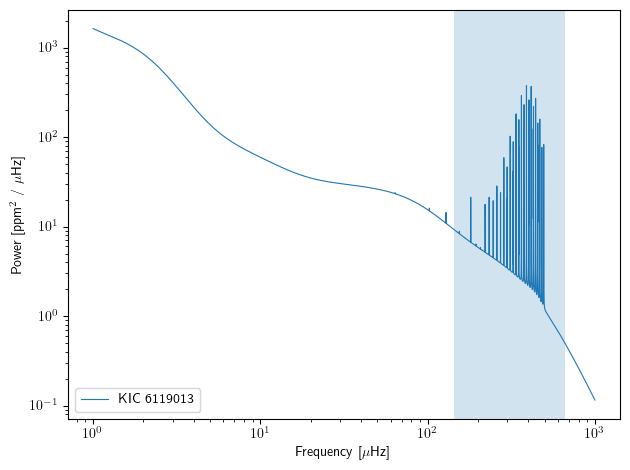

In [20]:
dnu = scale._solar_delta_nu * scale.delta_nu(mass * u.M_sun, rad * u.R_sun)
numax = scale._solar_nu_max * scale.nu_max(mass * u.M_sun, temp * u.K, rad * u.R_sun)
freq = np.sort(
    np.concatenate([
        np.geomspace(1, 1e3, 5_000),
        np.linspace(numax.value - 7*dnu.value, numax.value + 7*dnu.value, 5_000)
    ])
) * u.uHz

kernel.plot(freq=freq)
plt.axvspan(numax.value - 10*dnu.value, numax.value + 10*dnu.value, alpha=0.2)

In [27]:
from gadfly import Filter

filt = Filter('Kepler/Kepler.K')

In [21]:
for i, row in enumerate(sequence[cols]):
    ax = axes[i]
    kic, mass, rad, temp, lum, cad = row
    name = f'KIC {kic}'
    mass, rad, temp, lum = (
        mass * u.M_sun, rad * u.R_sun, 
        temp * u.K, lum * u.L_sun
    )
    # hp = Hyperparameters.for_star(
    #     mass, rad, temp, lum,
    #     name=name, quiet=True
    # )
    
    print(scale.p_mode_amplitudes(
        mass, rad, temp, filt
    ))

TypeError: too many positional arguments

mode lifetime $\tau = 1 / \eta $

FWHM line widths $\Gamma = \eta / \pi = (\tau \pi)^{-1}$

celerite: $\tau = 2Q/\omega_0$

FWHM line widths $\Gamma = \frac{\omega_0}{2\pi Q}$

quality $Q = \frac{\omega_0}{2\pi \Gamma}$


$$Q = \nu / \Gamma$$
$$Q \propto \nu / \Gamma$$

In [19]:
nu = 150*u.uHz
nu_max = nu
nu_solar = 3090*u.uHz
scale._lifetimes_lund(5090*u.K, nu, nu, 3090*u.uHz)

<Quantity 0.67099256 uHz>

In [25]:
# scale._lifetimes_with_nu_lund(nu, nu)

scale._scale_lifetimes_with_nu_lund(nu, nu, 3090*u.uHz)
# scale._scale_lifetimes_with_nu_lund(3090*u.uHz, 3090*u.uHz, 3090*u.uHz)

<Quantity 3.33573729>

In [27]:
scale._lifetimes_with_nu_lund(nu, nu_max), scale._lifetimes_with_nu_lund(nu_solar, nu_solar)

(<Quantity 3.24116505>, <Quantity 0.97164877>)

In [19]:
hp = Hyperparameters.for_star(
    1 * u.M_sun, 1 * u.R_sun, 
    5777 * u.K, 1 * u.L_sun, 
    quiet=True
)

Gamma_star [0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98] uHz


In [20]:
for i, row in enumerate(sequence[cols]):
    ax = axes[i]
    kic, mass, rad, temp, lum, cad = row
    name = f'KIC {kic}'
    hp = Hyperparameters.for_star(
        mass * u.M_sun, rad * u.R_sun, 
        temp * u.K, lum * u.L_sun, 
        name=name, quiet=True
    )

    cadence_str = 'short' if cad == 0 else 'long'
    light_curve = search_lightcurve(
        name, mission='Kepler', #quarter=range(6),
        cadence=cadence_str
    ).download_all()

    kernel = (
        StellarOscillatorKernel(hp, 1*u.min if cad == 0 else 30*u.min) #+
        # add in a kernel for Kepler shot noise
        # ShotNoiseKernel.from_kepler_light_curve(light_curve)
    )


p_mode_scale_terms (array([0.04663173, 0.04826752, 0.0540781 , 0.06045026, 0.05528901,
       0.06291698, 0.07208543, 0.08265669, 0.07399641, 0.08673292,
       0.10263478, 0.12190041, 0.10591009, 0.12937746, 0.16029225,
       0.19917358, 0.16662194, 0.21389824, 0.27623054, 0.35270029,
       0.28837592, 0.37976341, 0.48993126, 0.60850433, 0.5091858 ,
       0.64532512, 0.77921999, 0.89000714, 0.79881891, 0.91657342,
       0.98697484, 1.00200187, 0.99281037, 0.99671888, 0.93927805,
       0.84102688, 0.92682162, 0.80962272, 0.67194408, 0.53950812,
       0.65262972, 0.50662195, 0.38302527, 0.28816575, 0.36848539,
       0.26786853, 0.19579971, 0.14675948, 0.18832204, 0.13710955,
       0.10325845, 0.08053279, 0.09992089, 0.07603825, 0.06016334,
       0.04901056, 0.05864916, 0.04683408, 0.03847965, 0.03766756]), 25.01072465341419)
Q_fit [1424.2738543  1739.83599643 1286.00002318 1424.2738543  2638.62002962
 1739.83599643 1286.00002318 1424.2738543  2638.62002962 1739.83599643
 1286.0

p_mode_scale_terms (array([0.03742486, 0.03512399, 0.03856682, 0.04246242, 0.04663173,
       0.04328306, 0.04826752, 0.0540781 , 0.06045026, 0.05528901,
       0.06291698, 0.07208543, 0.08265669, 0.07399641, 0.08673292,
       0.10263478, 0.12190041, 0.10591009, 0.12937746, 0.16029225,
       0.19917358, 0.16662194, 0.21389824, 0.27623054, 0.35270029,
       0.28837592, 0.37976341, 0.48993126, 0.60850433, 0.5091858 ,
       0.64532512, 0.77921999, 0.89000714, 0.79881891, 0.91657342,
       0.98697484, 1.00200187, 0.99281037, 0.99671888, 0.93927805,
       0.84102688, 0.92682162, 0.80962272, 0.67194408, 0.53950812,
       0.65262972, 0.50662195, 0.38302527, 0.28816575, 0.36848539,
       0.26786853, 0.19579971, 0.14675948, 0.18832204, 0.13710955,
       0.10325845, 0.08053279, 0.09992089, 0.07603825, 0.06016334,
       0.04901056, 0.05864916, 0.04683408, 0.03847965, 0.03766756]), 15.13781294161336)
Q_fit [1424.2738543  2638.62002962 1739.83599643 1286.00002318 1424.2738543
 2638.620029

In [19]:
n_pxl_per_side = 200
np.degrees(np.arccos(0) - np.arccos(1/n_pxl_per_side))

0.28648009124091034

In [20]:
200**2

40000

In [23]:
# linear damping rate (chaplin 2008b, https://ui.adsabs.harvard.edu/abs/2008A%26A...485..813C/abstract)
omega_0 = 3090 * u.uHz
A = 2 * np.sqrt(2 * omega_0 * 1e-6 * u.cds.ppm**2 / u.uHz)
height = 2 * A ** 2 / (np.pi * scale._lifetimes_lund(omega_0.value, omega_0.value))

height

TypeError: _lifetimes_lund() takes 1 positional argument but 2 were given

In [ ]:
(2 / (np.pi * scale._lifetimes_lund(3090, 3090))).to(u.day)

In [ ]:


# # mass, rad, temp, lum = [1.5, 4, 5200, 10]
# # mass, rad, temp, lum = [1, 1, 5777, 1]
# # mass, rad, temp, lum = sequence[cols][sequence[cols].colnames[1:-1]][1]
# mass, rad, temp, lum = sequence[cols][sequence[cols].colnames[1:-1]][3]

# hp = Hyperparameters.for_star(mass * u.M_sun, rad * u.R_sun, temp * u.K, lum * u.L_sun, quiet=True)

# p_mode_hp = [p['hyperparameters'] for p in hp if 'w0' in p['metadata']['fixed_parameters']]
# ind = np.argmin([abs(p['w0']/(2*np.pi) - 3090) for p in p_mode_hp])

# params = p_mode_hp[ind]

# unscaled_lifetime = 2 * np.pi * 4 * params['Q'] / (params['w0'] * u.uHz)
# nu_solar = params['w0'] / (2 * np.pi) * u.uHz
# solar_fwhm = 1 / (np.pi * unscaled_lifetime)
# solar_Q = float(nu_solar / (4 * np.pi * solar_fwhm))


# scaled_nu_max = scale._solar_nu_max * scale.nu_max(mass * u.M_sun, temp * u.K, rad * u.R_sun)
# scaled_fwhm = scale.mode_width(
#     scaled_nu_max.value, scaled_nu_max.to(u.uHz).value
# ) * u.uHz
# scaled_lifetime = 1 / (np.pi * scaled_fwhm)
# # scaled_fwhm = 1 / (np.pi * scaled_lifetime)
# scaled_Q = float(scaled_nu_max / (4 * np.pi * scaled_fwhm))
# scale_factor_Q = (solar_Q / scaled_Q) ** 0.5

# scale_factor_amp = scale.p_mode_amplitudes(mass * u.M_sun, temp * u.K, lum * u.L_sun)

# amp_wl = scale.amplitude_with_wavelength(
#     "Kepler/Kepler.K", 5777 * u.K
# )

# unscaled_lifetime.to(u.d), scaled_lifetime.to(u.d), scaled_Q, solar_Q, scale_factor_amp, scale_factor_Q#, scale_factor_amp * scale_factor_Q #* amp_wl

In [ ]:
solar_S0, solar_w0, solar_Q = np.transpose([[param_set['hyperparameters'].get(param) for param in ['S0', 'w0', 'Q']] for param_set in hp])

In [ ]:
# scale_factor_Q = scale.quality(
#     30*u.uHz, scaled_nu_max, nu_solar
# )

In [ ]:
from gadfly import scale
scale.granulation_amplitude(
    mass * u.M_sun, temp * u.K, lum * u.L_sun
), scale.p_mode_amplitudes(mass * u.M_sun, temp * u.K, lum * u.L_sun)

In [ ]:
solar_nu = 3090*u.uHz
scaled_nu_max = scaled_nu = 30*u.uHz

In [ ]:
scale_factor_Q = scale.quality(
    scaled_nu, solar_nu, scaled_nu_max
)
scale_factor_Q ** -0.5

In [ ]:
unscaled_S0 = np.array([p['hyperparameters']['S0'] for p in hp if 'w0' in p['metadata']['fixed_parameters']])
unscaled_w0 = np.array([p['hyperparameters']['w0'] for p in hp if 'w0' in p['metadata']['fixed_parameters']])
fwhms = np.array([p['hyperparameters']['w0']/(2*p['hyperparameters']['Q']) for p in hp if 'w0' in p['metadata']['fixed_parameters']])

In [ ]:
scaled_fwhm = fwhms * 0.5
scaled_w0 = 0.8 * unscaled_w0

H = unscaled_S0**2 / fwhms

scaled_H = 0.25 * H
scaled_S0 = np.sqrt(scaled_H * scaled_fwhm)

In [ ]:
(scaled_S0 / unscaled_S0)

In [ ]:
plt.semilogy(unscaled_w0, H, '.')
plt.semilogy(scaled_w0, scaled_H, '.')

In [19]:
def _lifetimes_lund(nu, nu_max):
    # parameter pairs correspond to columns "b" and "a" in Table 4
    # of Lund 2017
    def f(param):
        # apply linear fit for parameter value as function
        # of temperature
        b, a = param
        return b + a * (nu_max / 3090)

    alpha = f([2.95, 0.39])
    Gamma_alpha = f([3.08, 3.32])
    # we'll clip the `Delta_Gamma_dip` parameter to have a hard minimum:
    Delta_Gamma_dip = f([-0.47, 0.62])
    if Delta_Gamma_dip > 0:
        log_Delta_Gamma_dip = np.log(Delta_Gamma_dip) 
    else: 
        log_Delta_Gamma_dip = 0
    
    W_dip = f([4637, -141])
    nu_dip = f([2984, 60])
    # print(alpha * np.log(nu / nu_max), np.log(Gamma_alpha))
    return np.exp(
        # power law trend:
        alpha * np.log(nu / nu_max) + np.log(Gamma_alpha) +
        # Lorentzian dip:
        log_Delta_Gamma_dip /
        (1 + (2 * np.log(nu / nu_dip) / np.log(W_dip / nu_max))**2)
    )

In [20]:
from gadfly import scale

In [21]:
_lifetimes_lund(884, 884)

4.029799352750809

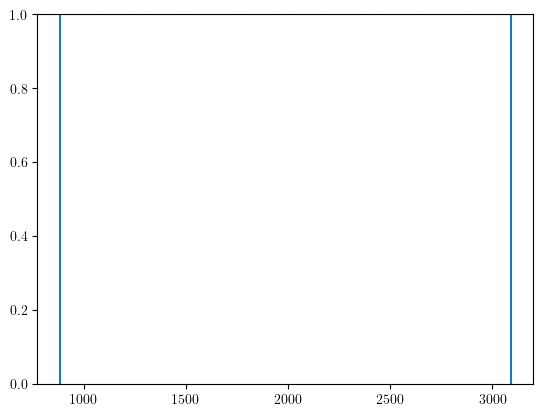

In [21]:
nu = np.logspace(1, 3.6)
nu_max = 3090
# plt.grid()
plt.axvline(nu_max)
plt.axvline(884)
plt.axhline(1, ls='--', color='r')

# plt.loglog(nu, scale._lifetimes_lund(nu, 884) / _lifetimes_lund(nu, scale._solar_nu_max.value));
# plt.loglog(nu, )



$\Delta \equiv$ FWHM of mode, corresponds to $\Delta = 1 / (\pi \tau)$ where $\tau$ is the mode lifetime

$\tau = 2 / (\pi \Gamma)$

$\Delta = 1 / (\pi \tau)$

$\tau = 1 / (\pi \Delta)$

$\tau = 2Q/\omega_0$

$\omega_0\tau/2 = Q$

$\tau = 2Q/\omega_0 = 1 / (\pi \Delta)$

$Q = \omega_0 / (2\pi \Delta)$

$H = A^2 / \Delta$

$\tau = 2 / (\pi \Gamma) = 1 / (\pi \Delta) = 2Q/\omega_0$

$\tau = 2 / (\pi \Gamma) = 1 / (\pi \Delta) = 2Q/\omega_0$

$\Gamma = \omega_0/\pi Q$

$Q = \pi\Gamma/\omega_0$


$\Delta = \omega_0 / (2\pi Q)$

In [27]:
1012 / 10**3.5

0.32002249920903997

In [ ]:
scale._lifetimes_lund

In [1]:
import numpy as np
from gadfly import scale
import astropy.units as u

nu_max = 3090 * u.uHz
gamma = scale._lifetimes_lund(nu_max.value, nu_max.value, 5777)
tau_osc = (1 / (np.pi * gamma)).to(u.d)
print('gamma', gamma)
print('tau_osc_solar', tau_osc)
Q = float(tau_osc * nu_max * np.pi)
Q2 = (nu_max / (gamma)).value
print('Q', Q2)

# 2 * 4000 / 3000
nu_max = 15 * u.uHz
gamma = scale._lifetimes_lund(nu_max.value, nu_max.value, 4900)
tau_osc = (1 / (np.pi * gamma)).to(u.d)
print('gamma', gamma)
print('tau_osc_solar', tau_osc)
Q = float(tau_osc * nu_max * np.pi)
Q2 = (nu_max / (gamma)).value
print('Q', Q2)


[-25.5, 29.1]
[6.3, -1.8]
alpha, Gamma_alpha 3.6000000000000014 4.5
[3.5, -3.3]
[-28021, 31971]
[-23818, 26785]
gamma 1.657012798418165 uHz
tau_osc_solar 2.2233637571890066 d
Q 1864.8015289621228
[-25.5, 29.1]
[6.3, -1.8]
alpha, Gamma_alpha -25.35873786407767 6.29126213592233
[3.5, -3.3]
[-28021, 31971]
[-23818, 26785]
gamma 9.882291454010609 uHz
tau_osc_solar 0.37280242323819707 d
Q 1.5178665868949281


$\tau = \frac{1}{\pi \Gamma}$
$\tau = \frac{Q}{\pi \nu} = \frac{1}{\pi \Gamma}$

$Q = \frac{\nu}{\Gamma}$

In [2]:
def _lifetimes_lund(nu, nu_max, temperature):
    # parameter pairs correspond to columns "b" and "a" in Table 4
    # of Lund 2017
    def f(param):
        # apply linear fit for parameter value as function
        # of temperature
        b, a = param
        return b + a * (temperature / 5777)

    alpha = f([-25.5, 29.1])
    Gamma_alpha = f([6.3, -1.8])
    print('alpha, Gamma_alpha', alpha, Gamma_alpha)
    Delta_Gamma_dip = f([3.5, -3.3])

    W_dip = f([-28021, 31971])
    nu_dip = f([-23818, 26785])

    if np.all(np.array([W_dip, nu_dip, Delta_Gamma_dip]) > 0):
        dip_term = (
            np.log(Delta_Gamma_dip) /
            (1 + (2 * np.log(nu / nu_dip) /
                  np.log(W_dip / nu_max)) ** 2)
        )
    else:
        dip_term = 0

    return np.pi / 2 * np.exp(
        # power law trend:
        alpha * np.log(nu / nu_max) + np.log(Gamma_alpha) +
        # Lorentzian dip:
        dip_term
    ) * u.uHz

In [6]:
def _lifetimes_lund(temperature):
    Gamma_0 = 0.07
    alpha = 0.91
    beta = 15.3
    return Gamma_0 + alpha * (temperature / 5777) ** beta


In [8]:
_lifetimes_lund(5777)

0.98

In [34]:
### damping timescale from celerite2:
Qtmp = 10**3.4
(Qtmp / nu_max / np.pi).to(u.d)

<Quantity 2.99486952 d>

gamma 4.863368433154297 uHz
tau_osc_solar 0.757528912694737 d


(3.08428205803673, 3.0842820580367296)

In [15]:
solar_nu_max = 3090 * u.uHz
Gamma_sun = scale.mode_width(solar_nu_max.value, solar_nu_max.value) * u.uHz

solar_w0_max = 2 * np.pi * solar_nu_max
solar_Q = float(np.pi * Gamma_sun / solar_w0_max)

# Gamma_star = (2*u.uHz)
star_nu_max = 30 * u.uHz
Gamma_star = scale.mode_width(star_nu_max.value, star_nu_max.value) * u.uHz
star_w0_max = 2 * np.pi * star_nu_max
star_Q = float(np.pi * Gamma_star / star_w0_max)

scale_factor_Q = star_Q / solar_Q

scale_factor_Q ** - 2

AttributeError: module 'gadfly.scale' has no attribute 'mode_width'

In [ ]:
# [p['hyperparameters']['Q'] for p in hp]

In [ ]:
hp

In [ ]:
# [p['hyperparameters']['w0']/(2*np.pi) for p in hp]

In [16]:
from gadfly import scale

In [17]:
hp = Hyperparameters.from_soho_virgo()

ind = np.argmin([abs(p['hyperparameters']['w0']/(2*np.pi) - 3090) for p in hp if 'w0' in p['metadata']['fixed_parameters']])

params = hp[ind]['hyperparameters']

print(params)

unscaled_Gamma = ((params['w0'] * u.uHz) / params['Q'])
print(unscaled_Gamma)
solar_lifetime = 3.2 * u.d # chaplin 2009 https://www.aanda.org/articles/aa/pdf/2009/23/aa11952-09.pdf
solar_nu_max = params['w0'] / (2*np.pi) * u.uHz
# expected_fwhm = 1 / (np.pi * solar_lifetime)
solar_w0 = 2*np.pi*solar_nu_max
solar_Q = float(np.pi * scale.mode_width(solar_nu_max.value, solar_nu_max.value) / params['w0'])

# print('expected Q', scaled_Q)
print('solar Q', solar_Q)
# ((2*np.pi*solar_nu_max) * solar_lifetime).decompose()

{'S0': 2.005257614261118e-07, 'w0': 18156.683944974837, 'Q': 1284.9844756784803}
14.129885838027722 uHz


AttributeError: module 'gadfly.scale' has no attribute 'mode_width'

In [18]:
params = hp[-10]['hyperparameters']

scaled_nu = 1000
scaled_w0 = 2*np.pi*scaled_nu
scaled_nu_max = 3000

unscaled_lifetime = (np.pi * params['Q'] / (params['w0'] * u.uHz)).to(u.d)  # this is the damping timescale
nu_solar = params['w0'] / (2 * np.pi)
scaled_lifetime = unscaled_lifetime * scale.mode_lifetime(
    scaled_nu, scaled_nu_max, nu_solar
)
original_fwhm = 1 / (np.pi * unscaled_lifetime)
scaled_fwhm = 1 / (np.pi * scaled_lifetime)

print('scale', scale.mode_lifetime(
    scaled_nu, scaled_nu_max, nu_solar
))

print('original_fwhm', original_fwhm)
print('scaled_fwhm', scaled_fwhm)

scaled_Q = scaled_w0 / (2 * scaled_lifetime)
scale_factor_Q = (scaled_Q / params['Q']) #** 2

print('unscaled_lifetime', unscaled_lifetime)
print('scaled_lifetime', scaled_lifetime)
print('scale_factor_Q', scale_factor_Q)

AttributeError: module 'gadfly.scale' has no attribute 'mode_lifetime'